---
title: "dynamic time warping"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

[This tutorial](https://www.theaidream.com/post/dynamic-time-warping-dtw-algorithm-in-time-series){target="_blank"} is excellent. Read it.

https://medium.com/walmartglobaltech/time-series-similarity-using-dynamic-time-warping-explained-9d09119e48ec



In [2]:
#| code-summary: "import stuff"
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()  # datetime converter for a matplotlib
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)

In [51]:
series1 = pd.Series([1,4,5,10,9,3,2,6,8,4,9])
series2 = pd.Series([1,7,3,4,1,10,5,4,7,4])

##Fill DTW Matrix
def fill_dtw_cost_matrix(s1, s2):
    N1, N2 = len(s1), len(s2)
    cost_matrix = np.zeros((N1+1, N2+1))
    for i in range(N1 + 1):
        for j in range(N2 + 1):
            cost_matrix[i, j] = np.inf
    cost_matrix[0, 0] = 0
    
    for i in range(1, N1+1):
        for j in range(1, N2+1):
            cost = abs(s1[i-1] - s2[j-1])
            #take last min from the window
            prev_min = np.min([cost_matrix[i-1, j],   # south
                               cost_matrix[i, j-1],   # west
                               cost_matrix[i-1, j-1]  # south-west
                               ]
                             )
            cost_matrix[i, j] = cost + prev_min
    return cost_matrix

def find_min_path(m):
    N1, N2 = m.shape
    path=[[N1-1, N2-1]]
    i,j = path[-1, 0], path[-1, 1]
    while (i>1) & (j>1):
        south = m[i-1, j]
        west = m[i, j-1]
        southwest = m[i-1, j-1]
        if southwest <= min(south, west):
            i = i-1
            j = j-1
        elif south <= west:
            i = i-1
        else:
            j = j-1
        path.append([i,j])
        # print(path[-1])
    return path
        
  
 ##Call DTW function
dtw_cost_matrix = fill_dtw_cost_matrix(series1,series2)

In [52]:
p = np.array(find_min_path(dtw_cost_matrix))
p


TypeError: list indices must be integers or slices, not tuple

In [44]:
p = np.array(p)
p[:,0]

array([12, 10,  9,  8,  7,  6,  5,  4,  3,  2,  2,  2,  1])

In [39]:
N1, N2 = dtw_cost_matrix.shape
i,j = N1, N2
dtw_cost_matrix[i-1, j]

IndexError: index 11 is out of bounds for axis 1 with size 11

In [31]:
find_min_path(dtw_cost_matrix)

IndexError: index 11 is out of bounds for axis 1 with size 11

In [26]:
stam = [[1,2]]
stam.append([3,4])

In [47]:
p-1

array([[11, 10],
       [ 9,  9],
       [ 8,  8],
       [ 7,  8],
       [ 6,  7],
       [ 5,  6],
       [ 4,  5],
       [ 3,  5],
       [ 2,  4],
       [ 1,  3],
       [ 1,  2],
       [ 1,  1],
       [ 0,  0]])

In [24]:
min(dtw_cost_matrix[5,3],dtw_cost_matrix[5,2])

10.0

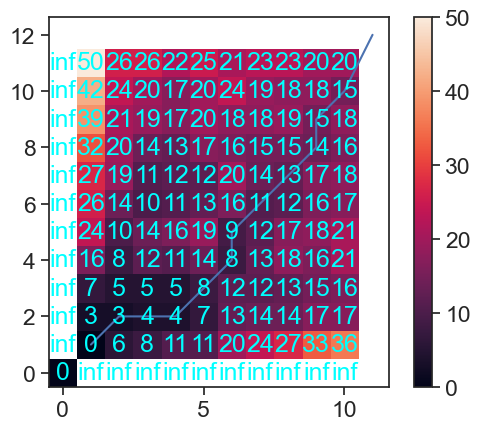

In [45]:
fig, ax = plt.subplots()

m = ax.imshow(dtw_cost_matrix, origin="lower")
plt.colorbar(m)

# https://stackoverflow.com/a/33829001
for (j,i),label in np.ndenumerate(dtw_cost_matrix):
    ax.text(i,j,f"{label:.0f}",ha='center',va='center', color="cyan")

ax.plot(p[:,1], p[:,0])

In [16]:
len(series1)

10